# Housing price prediction in Bay area

## 1. Introduction to dataset:

### The dataset used for this analysis is sourced from Bay Area Home Sales Database and Zillow based on the homes sold between January 2013 and December 2015. The dataset has 11331 records.

In [5]:
#importing data
import pandas as pd
df = pd.read_csv('final_data.csv')

In [6]:
df.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


## 2. Exploratory Data Analysis

In [7]:
print(df.columns.values)

['Unnamed: 0' 'address' 'info' 'z_address' 'bathrooms' 'bedrooms'
 'finishedsqft' 'lastsolddate' 'lastsoldprice' 'latitude' 'longitude'
 'neighborhood' 'totalrooms' 'usecode' 'yearbuilt' 'zestimate'
 'zindexvalue' 'zipcode' 'zpid']


### We will be dropping info, lastsolddate,z_address, zipcode, zipid and zestimate since we do not want our model to be affected by these coulmns . For the data from zillow we have zillowindex. Also we do not need zipcode since we have location and neighborhood in the dataset

In [8]:
df.drop(df.columns[[0, 2, 3,7, 15, 17, 18]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 12 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(4)
memory usage: 1.0+ MB


### zindexvalue data type would be numeric so we will convert it from object to numeric

In [9]:
df['zindexvalue'] = df['zindexvalue'].str.replace(',', '')
df['zindexvalue'] = df['zindexvalue'].convert_objects(convert_numeric=True)

C:\Users\Darshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 12 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null int64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.0+ MB


## Summary Statistics

In [12]:
df.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


### The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

## Now let's plot histogram for each variable

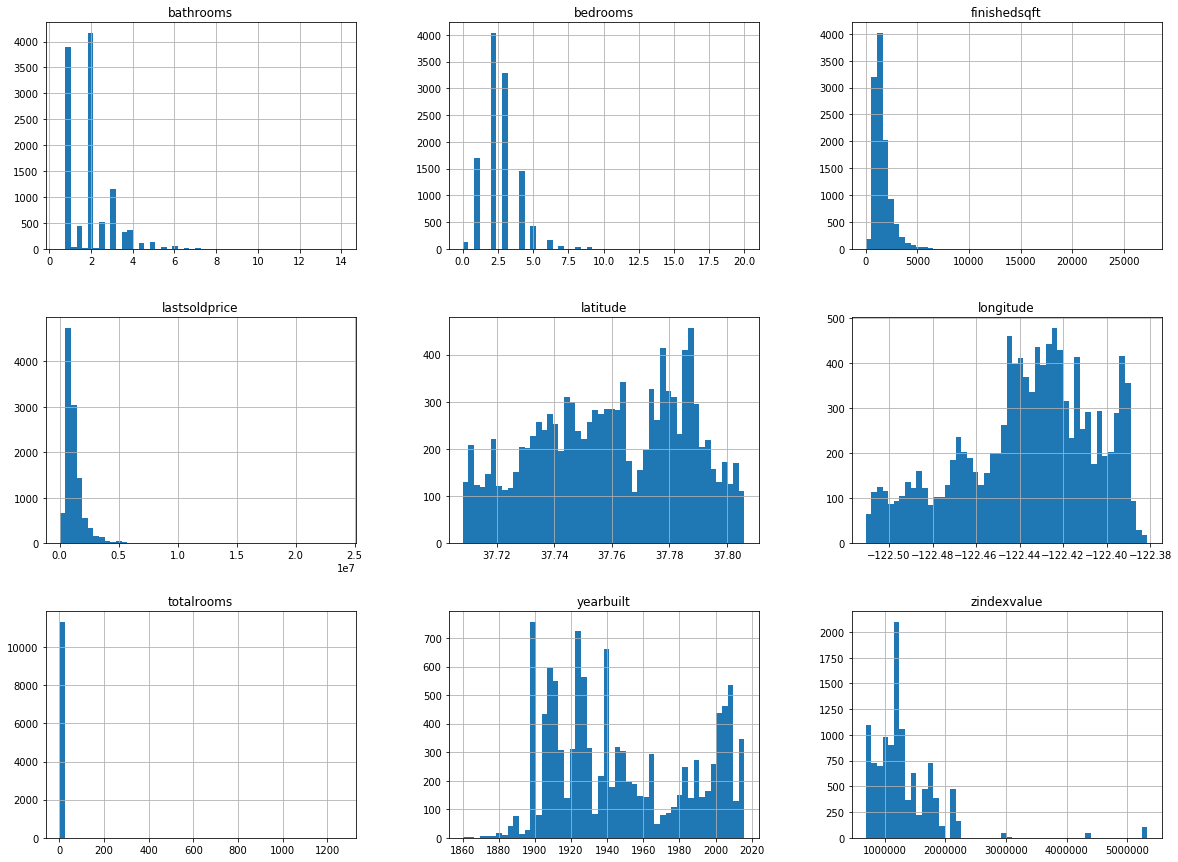

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Some of the histograms are a slightly skewed, but this is not abnormal.

### Scatter plot of latitude longitude

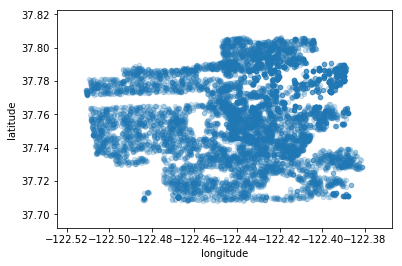

In [117]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

### Color code from  most to least expensive area

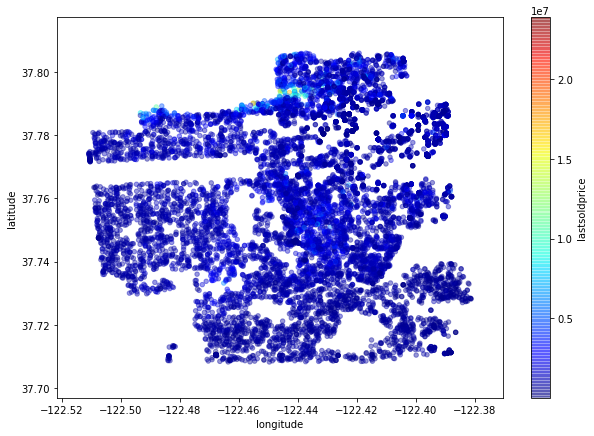

In [118]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)

### Above analysis shows that most expensive houses were sold in north area

## Variables correlation

### 'lastsoldprice' is target variables so let's find corrleation of this variable with other variables

In [119]:
import seaborn as sns
correlation = df.corr()['lastsoldprice'].sort_values(ascending=False)
correlation

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

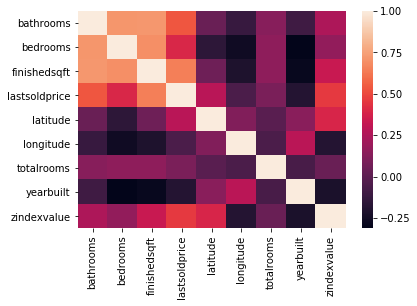

In [120]:
corr = df.corr()
sns.heatmap(corr)

### From above heatmap we can clearly observe the correlation of lastsoldprice with other variables

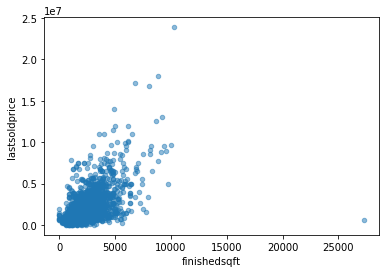

In [121]:
# Lets check correlation of finishedsqft
df.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)


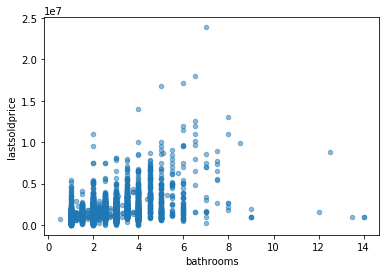

In [122]:
# Lets check correlation of finishedsqft
df.plot(kind="scatter", x="bathrooms", y="lastsoldprice", alpha=0.5)

### the dependent variabe i.e. lastsoldprice is affected most by finishedsqft and bathrooms

### Let's take a look at neighbourhood data

In [123]:
len(df['neighborhood'].value_counts())

71

### We would seggregate neighbourhood into two categories to relate to lastsoldprice
### 1. low price 2. high price
### we would need to calculate price per square feet for each neighbourhood

In [124]:
df['price_per_sqft'] = df['lastsoldprice']/df['finishedsqft']

In [125]:
df.head(5)

,address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,price_per_sqft
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,975700,1246.404602
1,Address: 260 King Street #475,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,975700,830.564784
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1277600,1049.122807
3,Address: 350 Missouri Street,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,1277600,1210.219632
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1248000,1176.923077


In [126]:
#Calculate how many addresses each neighboirhood has
freq = df.groupby('neighborhood').count()['address']

In [127]:
freq.head(5)

neighborhood
Bayview             354
Bernal Heights      525
Buena Vista Park     70
Central Richmond    227
Central Sunset      229
Name: address, dtype: int64

In [128]:
# calculate average price of the neighbourhood
mean = df.groupby('neighborhood').mean()['price_per_sqft']

In [129]:
mean.head(5)

neighborhood
Bayview              417.049058
Bernal Heights      3158.199830
Buena Vista Park     952.912618
Central Richmond     659.691461
Central Sunset       610.067525
Name: price_per_sqft, dtype: float64

In [130]:
#calculate neighbourhood groups
neigh_group = pd.concat([freq, mean], axis=1)

In [131]:
neigh_group.head(5)

,address,price_per_sqft
neighborhood,,
Bayview,354,417.049058
Bernal Heights,525,3158.199830
Buena Vista Park,70,952.912618
Central Richmond,227,659.691461
Central Sunset,229,610.067525


In [132]:
neigh_group['neighborhood'] = neigh_group.index

In [133]:
neigh_group.head(5)

,address,price_per_sqft,neighborhood
neighborhood,,,
Bayview,354,417.049058,Bayview
Bernal Heights,525,3158.199830,Bernal Heights
Buena Vista Park,70,952.912618,Buena Vista Park
Central Richmond,227,659.691461,Central Richmond
Central Sunset,229,610.067525,Central Sunset


In [134]:
neigh_group.columns = ['freq', 'price_per_sqft','neighborhood']

In [135]:
neigh_group.head(5)

,freq,price_per_sqft,neighborhood
neighborhood,,,
Bayview,354,417.049058,Bayview
Bernal Heights,525,3158.199830,Bernal Heights
Buena Vista Park,70,952.912618,Buena Vista Park
Central Richmond,227,659.691461,Central Richmond
Central Sunset,229,610.067525,Central Sunset


In [136]:
neigh_group.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


### For price_per_sqft, value at 50th percentile is 756, we would consider price per sq, foot below 756 i slow price and price_per_sqft above 756 as high price

In [137]:
group1 = neigh_group[neigh_group.price_per_sqft < 756]

In [138]:
group2 = neigh_group[neigh_group.price_per_sqft >= 756]

In [139]:
def assign_group(x):
    if x in group1.index:
        return 'low_price'
    else:
        return 'high_price'

In [140]:
df['group'] = df.neighborhood.apply(assign_group)

In [141]:
df.head(5)

,address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,price_per_sqft,group
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,975700,1246.404602,high_price
1,Address: 260 King Street #475,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,975700,830.564784,high_price
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1277600,1049.122807,high_price
3,Address: 350 Missouri Street,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,1277600,1210.219632,high_price
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1248000,1176.923077,high_price


### Since we have taken in consideration significance of columns address, latitude,longitude,neighborhood,price_per_sqft into high price and low price neighbourhood we will drop these columns.

In [144]:
df.drop(df.columns[[0, 5, 6, 7, 12]], axis=1, inplace=True)

In [145]:
df.head(5)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,usecode,yearbuilt,zindexvalue,group
0,2.0,2.0,1043.0,1300000.0,4.0,Condominium,2007.0,975700,high_price
1,1.0,1.0,903.0,750000.0,3.0,Condominium,2004.0,975700,high_price
2,4.0,3.0,1425.0,1495000.0,6.0,Condominium,2003.0,1277600,high_price
3,3.0,3.0,2231.0,2700000.0,10.0,SingleFamily,1927.0,1277600,high_price
4,3.0,3.0,1300.0,1530000.0,4.0,SingleFamily,1900.0,1248000,high_price


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 9 columns):
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsoldprice    11330 non-null float64
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null int64
group            11330 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 796.7+ KB


In [149]:
#Define target variable and covariate in the dataset 
y = df['lastsoldprice']
x = df[['bathrooms','bedrooms','finishedsqft','totalrooms','zindexvalue','yearbuilt','usecode','group']]

In [150]:
# Assign dummies for usecode and group
n = pd.get_dummies(df.group)
x = pd.concat([x, n], axis=1)

m = pd.get_dummies(df.usecode)
x = pd.concat([x, m], axis=1)

In [151]:
x.drop(['usecode','group'], inplace=True, axis=1)


In [152]:
x.head(5)

,bathrooms,bedrooms,finishedsqft,totalrooms,zindexvalue,yearbuilt,high_price,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,975700,2007.0,1,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,975700,2004.0,1,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,1277600,2003.0,1,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1277600,1927.0,1,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1248000,1900.0,1,0,0,0,0,0,0,0,0,0,1,0


## 2. Create train test split

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 3. Compare several ML models fro r_square, RMSE and MAE


In [162]:
# Create 3 models. Fit and predict on test data and compare the mean absolute error of each model. 
# Choose model with lowest mean absolute error. 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
grad_boosted = GradientBoostingRegressor()
randf = RandomForestRegressor()
lin = LinearRegression()
maeArr = []
rsqArr = []
rmseArr = []
list = [grad_boosted,randf,lin]
labels = ['Gradient Boosted Regressor','Random Forest Regressor','Linear Regression']
for i in list:
    model = i.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_pred,y_test)
    maeArr.append(mae)
    r_square = model.score(x_test,y_test)
    rsqArr.append(r_square)
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mse)
    rmseArr.append(rmse)

C:\Users\Darshana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<BarContainer object of 3 artists>

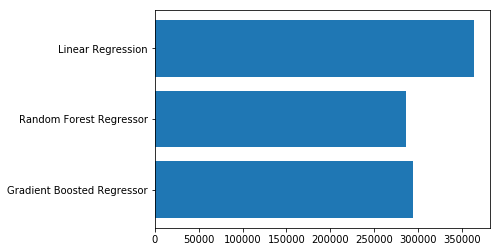

In [164]:
# Plot the graph of mae, mae should be minimum
plt.barh(labels, maeArr)


<BarContainer object of 3 artists>

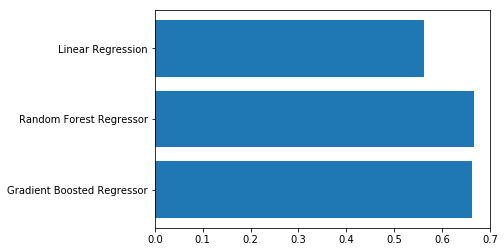

In [167]:
# Plot the graph of r square, r square should be maximum
plt.barh(labels, rsqArr)


<BarContainer object of 3 artists>

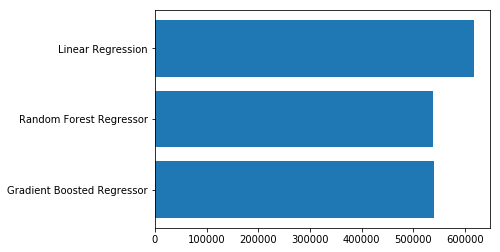

In [168]:
# Plot the graph of rmse, should be minimum
plt.barh(labels, rmseArr)

### We can see that random forest regressor and gradient boosted regressor perform nearly same but the closer look suggests that Random forest is best suited model

## 4. Calculate the feature importance

In [170]:
#Calculate fit for random forest model
randf = RandomForestRegressor()
final_model = randf.fit(x_train,y_train)


C:\Users\Darshana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [172]:
#Calculate feature importance
feature_importance = final_model.feature_importances_

            features    Importance
2       finishedsqft  5.478408e-01
4        zindexvalue  1.482966e-01
5          yearbuilt  6.253846e-02
3         totalrooms  6.148305e-02
0          bathrooms  6.058667e-02
6         high_price  3.257911e-02
1           bedrooms  2.892792e-02
7          low_price  2.475148e-02
16      SingleFamily  2.283721e-02
14   MultiFamily2To4  5.518220e-03
9        Condominium  2.717407e-03
11            Duplex  1.497078e-03
12     Miscellaneous  2.412515e-04
17         Townhouse  1.148235e-04
8          Apartment  3.148852e-05
13            Mobile  1.990343e-05
15  MultiFamily5Plus  1.757431e-05
10       Cooperative  9.646837e-07


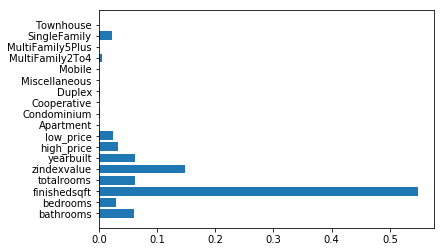

In [173]:
features = []
features = (x.columns.values)
plt.barh(features,feature_importance)
feature_df = pd.DataFrame({'features':features,'Importance':feature_importance})
print(feature_df.sort_values('Importance',ascending=False))

### The most important features are finishedsqft, zindexvalue, yearbuilt, totalrooms, bathrooms etc. rest can be counted as least important features